In [28]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
np.random.seed(7)

In [2]:
aapl_df = yf.download('AAPL', 
                      start='2012-01-01', 
                      end='2021-12-31', 
                      progress=False)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.591940,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.659609,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.800154,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.933963,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.913450,394024400


In [3]:
aapl_df.shape

(2516, 6)

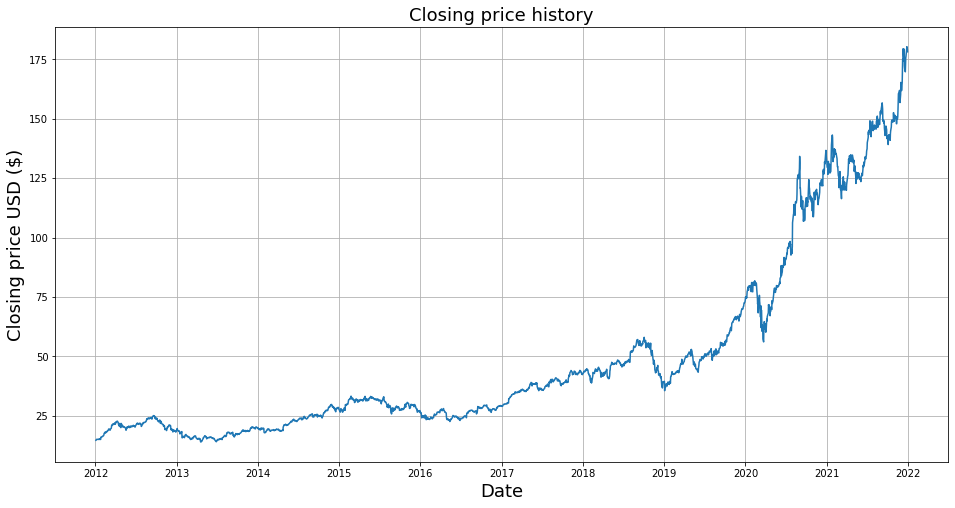

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history', fontsize=18)
plt.plot(aapl_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.grid(True)
plt.show()

In [5]:
max(aapl_df['Close'])/min(aapl_df['Close'])

12.929198700254236

In [6]:
# Number of rows to train the model on
data = aapl_df.filter(['Close'])
print(type(data))
dataset = data.values
print(type(dataset))
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
2013


In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data.min(), scaled_data.max(), scaled_data.mean())
scaled_data

0.0 1.0 0.21063389252496925


array([[0.00444329],
       [0.00491767],
       [0.00590292],
       ...,
       [0.99374929],
       [0.99429028],
       [0.98719814]])

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		dataX.append(dataset[i:(i+look_back), 0]
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

num_of_days=60
for i in range(num_of_days, len(train_data)):
  x_train.append(train_data[i-num_of_days:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791635, 0.00641379,
       0.0120484 , 0.01161266, 0.01218148, 0.01341144, 0.01415627,
       0.01409403, 0.01386435, 0.01484316, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552852,
       0.02299779, 0.0239723 , 0.02395298, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304348, 0.03319588, 0.03061578, 0.02999328, 0.03008558,
       0.03251115, 0.03319374, 0.03465981, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549971,
       0.04482142, 0.04411522, 0.04646135, 0.04807125, 0.04874525])]
[0.047079553022239484]

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.0

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)
print(len(x_train), len(y_train))

1953 1953


In [10]:
x_train.shape

(1953, 60)

In [11]:
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1953, 60)
(1953, 60, 1)


In [12]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1953/1953 [==============================] - 59s 29ms/step - loss: 1.9912e-04
Epoch 2/10
1953/1953 [==============================] - 56s 28ms/step - loss: 7.5800e-05
Epoch 3/10
1953/1953 [==============================] - 55s 28ms/step - loss: 6.3892e-05
Epoch 4/10
1953/1953 [==============================] - 55s 28ms/step - loss: 4.8150e-05
Epoch 5/10
1953/1953 [==============================] - 56s 29ms/step - loss: 4.8492e-05
Epoch 6/10
1953/1953 [==============================] - 56s 29ms/step - loss: 5.3950e-05
Epoch 7/10
1953/1953 [==============================] - 57s 29ms/step - loss: 3.2461e-05
Epoch 8/10
1953/1953 [==============================] - 57s 29ms/step - loss: 3.4984e-05
Epoch 9/10
1953/1953 [==============================] - 57s 29ms/step - loss: 3.6816e-05
Epoch 10/10
1953/1953 [==============================] - 56s 29ms/step - loss: 2.7895e-05


In [15]:
# Create the testing dataset
test_data = scaled_data[training_data_len-num_of_days:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(num_of_days, len(test_data)):
  x_test.append(test_data[i-num_of_days:i, 0])

In [16]:
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(503, 60)
(503, 60, 1)


In [17]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
# Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.8475980360512705

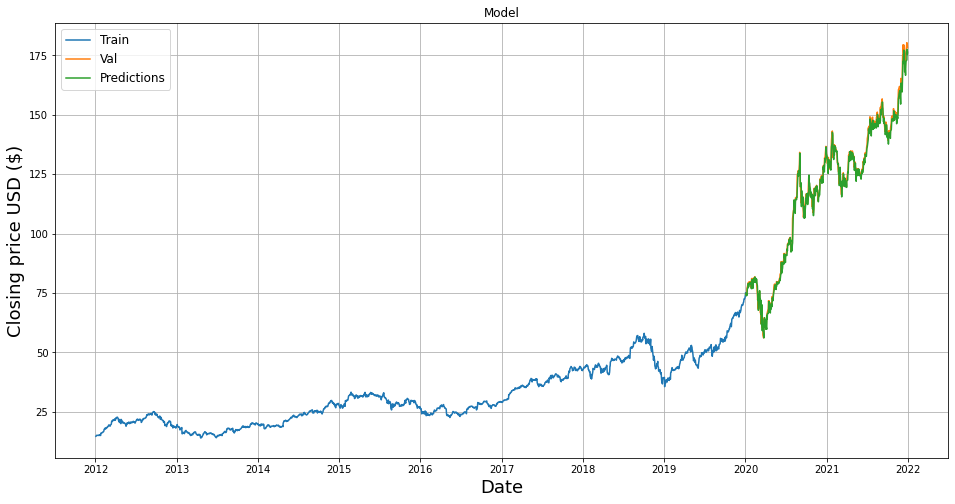

In [25]:
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], fontsize=12)
plt.grid(True)
plt.show()

In [20]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-01-03,74.357498,74.761719
2020-01-06,74.949997,73.787285
2020-01-07,74.597504,74.687973
2020-01-08,75.797501,74.108955
2020-01-09,77.407501,75.535561
...,...,...
2021-12-23,176.279999,172.468307
2021-12-27,180.330002,173.085236
2021-12-28,179.289993,177.474716


In [21]:
# Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2022-01-14', progress=False)
apple_quote.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-07,172.889999,174.139999,171.029999,172.169998,172.169998,86580100
2022-01-10,169.080002,172.500000,168.169998,172.190002,172.190002,106606900
2022-01-11,172.320007,175.179993,170.820007,175.080002,175.080002,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,175.529999,74805200
2022-01-13,175.779999,176.619995,171.789993,172.190002,172.190002,84505800


In [22]:
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
print(last_60_days_scaled.shape)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
print(X_test.shape)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#print(X_test.shape)

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

(60, 1)
(1, 60, 1)
[[168.89165]]


In [23]:
apple_quote2 = yf.download('AAPL', start='2022-01-15', end='2022-01-15', progress=False)
print(apple_quote2['Close'])

Date
2022-01-14    173.070007
Name: Close, dtype: float64
